## Import libraries and load data

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns

In [2]:
df = pd.read_csv(r'data/london_weather_MODIFIED - london_weather_MODIFIED (1).csv')

In [3]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## Convert the date column to datetime dtype.

In [5]:
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

## Set the date column as the index.

In [6]:
df = df.set_index('date')
df


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [7]:
df.index


DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

## Filter out only the required data:
- Keep only data from the year 2000 or later.
- Keep only the following features:
  - precipitation
  - mean_temp
  - min_temp
  - max_temp
  - snow_depth

In [8]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


## Resample and Impute Values

In [9]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [10]:
agg_dict = {'precipitation': 'sum', 'mean_temp': 'mean'}

In [11]:
df_month = df.copy()
df_month = df.resample('M').agg(agg_dict['precipitation'])
df_month

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-31,14.3,159.5,78.3,236.6,0.0
2000-02-29,62.2,200.9,110.0,288.0,0.0
2000-03-31,13.4,254.6,147.0,366.2,0.0
2000-04-30,71.8,256.1,149.9,373.5,0.0
2000-05-31,68.4,402.4,278.9,520.2,0.0
...,...,...,...,...,...
2020-08-31,45.2,578.1,463.8,712.6,0.0
2020-09-30,19.2,479.6,334.8,625.6,0.0
2020-10-31,143.4,331.5,257.9,418.3,0.0


In [12]:
df_year = df.copy()
df_year = df.resample('A').agg(agg_dict['mean_temp'])
df_year

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-12-31,2.107289,11.532070,7.973469,15.108746,0.008746
2001-12-31,1.952023,11.313006,7.641618,14.965029,0.000000
2002-12-31,2.148286,12.006286,8.353143,15.732000,0.000000
2003-12-31,1.311396,12.232764,7.986040,16.494302,0.025641
2004-12-31,1.710951,11.872046,8.212392,15.514409,0.005764
2005-12-31,1.218497,11.879883,8.026301,15.732659,0.008721
2006-12-31,1.737931,12.387941,8.518103,16.173276,0.000000
2007-12-31,1.881449,12.063717,8.218551,15.942609,0.032609
2008-12-31,1.755932,11.174855,7.451412,15.025141,0.021858


In [13]:
df_month.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [14]:
df_year.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       1
dtype: int64

In [32]:
df_year = df_year.interpolate()
df_year.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Q1: What month had the most precipitation between 2000 through 2010?
 - Resample the data as Monthly frequency.
 - Find the date and corresponding value for the max precipitation.
 - Plot the feature and time period that corresponds to the question.
 - Make sure to meet the "Visualization Requirements" below!
 - Determine the date and value for the most precipitation (the max precipitation).
 - Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
 - Make sure to add a legend so that your label is visible.

### Precipitation

In [38]:
df_month = df_month.loc['2000':'2010']
df_month.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=132, freq='M')

In [39]:
df_month.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-31,14.3,159.5,78.3,236.6,0.0
2000-02-29,62.2,200.9,110.0,288.0,0.0
2000-03-31,13.4,254.6,147.0,366.2,0.0
2000-04-30,71.8,256.1,149.9,373.5,0.0
2000-05-31,68.4,402.4,278.9,520.2,0.0


In [40]:
df_month.loc[df_month['precipitation'].idxmax()]

precipitation    138.4
mean_temp        288.1
min_temp         214.1
max_temp         356.1
snow_depth         0.0
Name: 2009-11-30 00:00:00, dtype: float64

In [41]:
precipitation, mean_temp, min_temp, max_temp, snow_depth = df_month.loc[df_month['precipitation'].idxmax()]

In [42]:
date = df_month.loc[df_month['precipitation'].idxmax()].name.date()
print(date)

2009-11-30


In [43]:
print(f'Date of highest precipitation: {date}')
print(f'Precipitation: {precipitation}')


Date of highest precipitation: 2009-11-30
Precipitation: 138.4


In [46]:
ts_precip = df_month['precipitation']
ts_precip

date
2000-01-31    14.3
2000-02-29    62.2
2000-03-31    13.4
2000-04-30    71.8
2000-05-31    68.4
              ... 
2010-08-31    83.8
2010-09-30    38.0
2010-10-31    61.0
2010-11-30    22.0
2010-12-31    21.2
Freq: M, Name: precipitation, Length: 132, dtype: float64

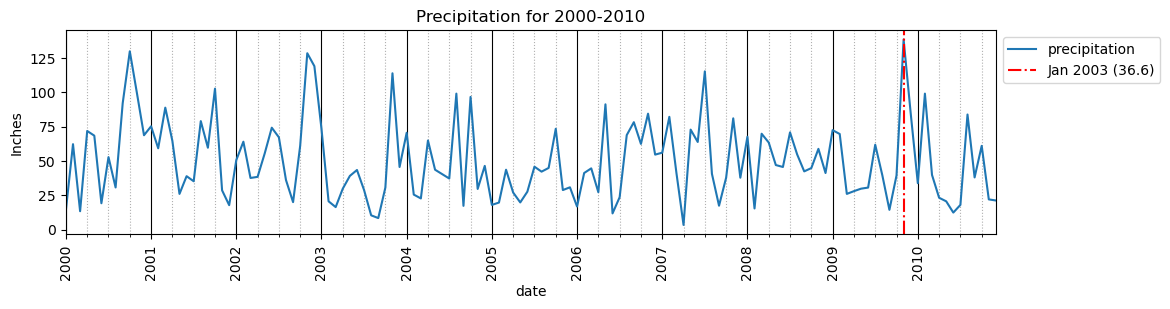

In [48]:
# create wide figure, ax = plt.subplots for 4 digit year labels
fig, ax = plt.subplots(figsize=(12,3))
# title 'Precipitation for 2000-2010, y label = inches'
ts_precip.plot(ax = ax, title='Precipitation for 2000-2010', ylabel='Inches')
# major axis set to 1 year, 4 digit year
ax.grid(which='major',axis='x',color='k')
ax.grid(which='minor',axis='x',ls=":")

fig.autofmt_xdate(rotation=90,ha='center')
# add line for date and max precip
ax.axvline(max_date, color = 'red', ls ="-.", label=f'Jan 2003 ({q1.max()})')
ax.legend(bbox_to_anchor=[1,1]);

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [49]:
df_year.index


DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', name='date', freq='A-DEC')

In [50]:
df_year.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-12-31,2.107289,11.532070,7.973469,15.108746,0.008746
2001-12-31,1.952023,11.313006,7.641618,14.965029,0.000000
2002-12-31,2.148286,12.006286,8.353143,15.732000,0.000000
2003-12-31,1.311396,12.232764,7.986040,16.494302,0.025641
2004-12-31,1.710951,11.872046,8.212392,15.514409,0.005764


In [51]:
df_year.loc[df_year['mean_temp'].idxmin()]

precipitation     1.378426
mean_temp        10.645773
min_temp          6.764723
max_temp         14.491545
snow_depth        0.294118
Name: 2010-12-31 00:00:00, dtype: float64

In [54]:
precipitation2, mean_temp2, min_temp2, max_temp2, snow_depth2 = df_year.loc[df_year['mean_temp'].idxmin()].round(2)

In [55]:
date2 = df_year.loc[df_year['mean_temp'].idxmin()].name.date()
print(date2)

2010-12-31


In [56]:
print(f'Date of lowest temperature: {date2}')
print(f'Temperature: {mean_temp2}')

Date of lowest temperature: 2010-12-31
Temperature: 10.65


In [57]:
ts_temp = df_year['mean_temp'].round(2)
ts_temp

date
2000-12-31    11.53
2001-12-31    11.31
2002-12-31    12.01
2003-12-31    12.23
2004-12-31    11.87
2005-12-31    11.88
2006-12-31    12.39
2007-12-31    12.06
2008-12-31    11.17
2009-12-31    11.72
2010-12-31    10.65
2011-12-31    12.47
2012-12-31    11.32
2013-12-31    11.20
2014-12-31    12.61
2015-12-31    12.09
2016-12-31    11.89
2017-12-31    12.24
2018-12-31    12.44
2019-12-31    12.23
2020-12-31    12.72
Freq: A-DEC, Name: mean_temp, dtype: float64

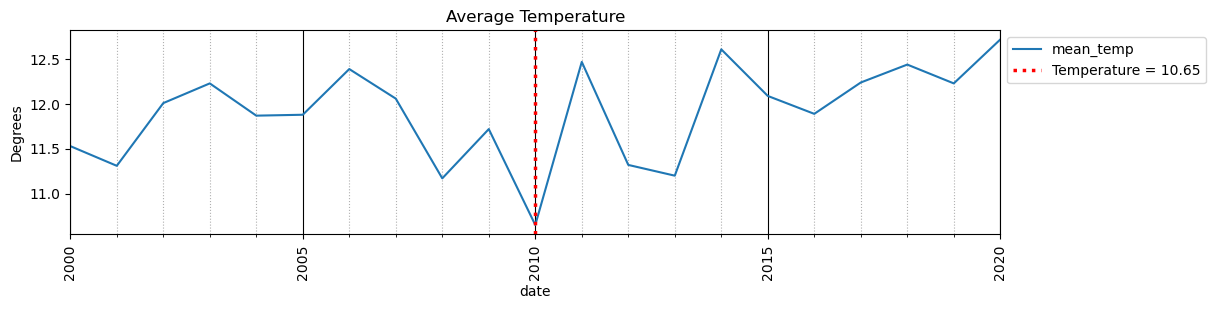

In [59]:
# create wide figure, ax = plt.subplots for 4 digit year labels
fig, ax = plt.subplots(figsize=(12,3))
# title as Average temperature with y label set to Degrees
ts_temp.plot(ax = ax, title='Average Temperature', ylabel='Degrees')
# major ticks every 5 years with 4 digit labels
ax.grid(which='major',axis='x',color='k')
# minor axix every 1 year
ax.grid(which='minor',axis='x',ls=":")
ax.axvline(date2, color='red',lw=2.5, ls=':', label=f'Temperature = {mean_temp2}')
# rotate tick labels 90 degrees
fig.autofmt_xdate(rotation=90, ha='center')
ax.legend(bbox_to_anchor=[1,1]);